## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
        Path("Starter_Code/Resources/bitstamp.csv"),
        index_col="Timestamp",
        parse_dates=True,
        infer_datetime_format=True
)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
display(bitstamp)
bitstamp.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106
2018-03-31 23:58:00,6927.65,6929.42,6927.65,$6927.65,0.839507,5817.007705,6929.080007
2018-03-31 23:59:00,6929.98,6929.98,6928.00,$6928.01,0.209363,1450.735763,6929.289993


In [40]:
# And just checking to see what summarized info looks like with describe()
bitstamp.describe()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129067.000000,129067.000000,129067.000000,129067.000000,129067.000000,1.290670e+05,129067.000000
mean,10459.993683,10472.970114,10446.214703,10459.842453,11.792878,1.177496e+05,10459.384448
std,2315.909269,2318.929342,2312.331601,2315.976088,21.799938,2.070551e+05,2315.723480
min,5945.950000,5975.060000,5920.720000,5944.000000,0.000039,3.333436e-01,5949.997212
25%,8613.985000,8621.655000,8604.440000,8613.370000,1.711874,1.773244e+04,8613.587020
50%,10145.300000,10156.410000,10131.740000,10145.950000,4.994095,5.188050e+04,10144.740411
75%,11444.455000,11453.990000,11431.970000,11444.810000,12.717950,1.313104e+05,11443.791560
max,17234.980000,17234.990000,17214.960000,17234.980000,580.646391,5.483271e+06,17227.810502


In [4]:
# getting some info for the bitstamp dataframe
bitstamp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129540 entries, 2018-01-01 00:00:00 to 2018-03-31 23:59:00
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Open            129067 non-null  float64
 1   High            129067 non-null  float64
 2   Low             129067 non-null  float64
 3   Close           129540 non-null  object 
 4   BTC Volume      129067 non-null  float64
 5   USD Volume      129067 non-null  float64
 6   Weighted Price  129067 non-null  float64
dtypes: float64(6), object(1)
memory usage: 7.9+ MB


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [5]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
        Path("Starter_Code/Resources/coinbase.csv"),
        index_col="Timestamp",
        parse_dates=True,
        infer_datetime_format=True
)

In [6]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
display(coinbase.head())
coinbase.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


In [7]:
coinbase.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129540 entries, 2018-01-01 00:00:00 to 2018-03-31 23:59:00
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Open            129322 non-null  float64
 1   High            129322 non-null  float64
 2   Low             129322 non-null  float64
 3   Close           129540 non-null  object 
 4   BTC Volume      129322 non-null  float64
 5   USD Volume      129322 non-null  float64
 6   Weighted Price  129322 non-null  float64
dtypes: float64(6), object(1)
memory usage: 7.9+ MB


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [8]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
# YOUR CODE HERE
# First we will see how many cells in bitstamp are NaN
bitstamp.isnull().sum()

Open              473
High              473
Low               473
Close               0
BTC Volume        473
USD Volume        473
Weighted Price    473
dtype: int64

In [9]:
# and we can see the percentage of missing items in each column - pretty small!
bitstamp.isnull().mean()

Open              0.003651
High              0.003651
Low               0.003651
Close             0.000000
BTC Volume        0.003651
USD Volume        0.003651
Weighted Price    0.003651
dtype: float64

In [10]:
'''
To gain some insight into the rows that have missing data, we can pull those out of 
the dataframe for further examination. We notice that the 'Close' column actually 
has non-numeric values like the other columns, but it was masked when we ran the
isnull() function above since it's seeing those as strings with "$" in front of them.
Based on this information, it confirms that we can drop the missing data with dropna()
since these rows represent a very small part of the whole dataframe, and all NaN's
for each column occur in the same rows (473 of them, out of a total of 129,540 rows).
'''
bitstamp[bitstamp['Open'].isnull()]

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 03:57:00,NaN,NaN,NaN,$nan,NaN,NaN,NaN
2018-01-01 04:42:00,NaN,NaN,NaN,$nan,NaN,NaN,NaN
2018-01-01 05:01:00,NaN,NaN,NaN,$nan,NaN,NaN,NaN
2018-01-01 05:02:00,NaN,NaN,NaN,$nan,NaN,NaN,NaN
2018-01-01 05:03:00,NaN,NaN,NaN,$nan,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2018-03-31 15:27:00,NaN,NaN,NaN,$nan,NaN,NaN,NaN
2018-03-31 15:59:00,NaN,NaN,NaN,$nan,NaN,NaN,NaN
2018-03-31 20:43:00,NaN,NaN,NaN,$nan,NaN,NaN,NaN


In [11]:
# this will remove the rows with missing data from the Bitstamp dataframe.
bitstamp = bitstamp.dropna()
bitstamp # We can see the total rows is now 129,067

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106


In [12]:
# and further testing to make sure there are now no NaN's in Bitstamp
bitstamp.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [13]:
# Use the str.replace function to remove the dollar sign, $
bitstamp['Close'] = bitstamp['Close'].str.replace('$','')

C:\Users\owner\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


In [14]:
# Check to make sure Close column successfully updated, no "$" in front of figures
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329


### Step 3: Convert the data type of the Close column to a `float`.

In [15]:
# Here we see the Close column is still string (Dtype == object)
bitstamp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129067 entries, 2018-01-01 00:00:00 to 2018-03-31 23:59:00
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Open            129067 non-null  float64
 1   High            129067 non-null  float64
 2   Low             129067 non-null  float64
 3   Close           129067 non-null  object 
 4   BTC Volume      129067 non-null  float64
 5   USD Volume      129067 non-null  float64
 6   Weighted Price  129067 non-null  float64
dtypes: float64(6), object(1)
memory usage: 7.9+ MB


In [16]:
# Now we'll convert the Close column to float
bitstamp['Close'] = bitstamp['Close'].astype(float)
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.00,1.069665,14582.660932,13632.923329


In [17]:
# and we'll confirm all Columns are now floats (Dtype == float)
bitstamp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129067 entries, 2018-01-01 00:00:00 to 2018-03-31 23:59:00
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Open            129067 non-null  float64
 1   High            129067 non-null  float64
 2   Low             129067 non-null  float64
 3   Close           129067 non-null  float64
 4   BTC Volume      129067 non-null  float64
 5   USD Volume      129067 non-null  float64
 6   Weighted Price  129067 non-null  float64
dtypes: float64(7)
memory usage: 7.9 MB


### Step 4: Review the data for duplicated values, and drop them if necessary.

In [18]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [19]:
# Repeat Steps 1–4 for the coinbase DataFrame
# For the coinbase DataFrame, replace or drop all NaNs or missing values in the DataFrame
# First we will see how many cells in bitstamp are NaN
coinbase.isnull().sum()

Open              218
High              218
Low               218
Close               0
BTC Volume        218
USD Volume        218
Weighted Price    218
dtype: int64

In [20]:
# and we can see the percentage of missing items in each column - pretty small!
coinbase.isnull().mean()

Open              0.001683
High              0.001683
Low               0.001683
Close             0.000000
BTC Volume        0.001683
USD Volume        0.001683
Weighted Price    0.001683
dtype: float64

In [21]:
'''
To gain some insight into the rows that have missing data, we can pull those out of 
the dataframe for further examination. We notice that the 'Close' column actually 
has non-numeric values like the other columns, but it was masked when we ran the
isnull() function above since it's seeing those as strings with "$" in front of them.
Based on this information, it confirms that we can drop the missing data with dropna()
since these rows represent a very small part of the whole dataframe, and all NaN's
for each column occur in the same rows (218 of them, out of a total of 129,540 rows).
'''
coinbase[coinbase['Open'].isnull()]

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-16 18:34:00,NaN,NaN,NaN,$nan,NaN,NaN,NaN
2018-01-16 18:35:00,NaN,NaN,NaN,$nan,NaN,NaN,NaN
2018-01-16 18:36:00,NaN,NaN,NaN,$nan,NaN,NaN,NaN
2018-01-16 18:37:00,NaN,NaN,NaN,$nan,NaN,NaN,NaN
2018-01-16 18:38:00,NaN,NaN,NaN,$nan,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2018-03-24 04:48:00,NaN,NaN,NaN,$nan,NaN,NaN,NaN
2018-03-24 05:17:00,NaN,NaN,NaN,$nan,NaN,NaN,NaN
2018-03-25 05:40:00,NaN,NaN,NaN,$nan,NaN,NaN,NaN


In [22]:
# this will remove the rows with missing data from the coinbase dataframe.
coinbase = coinbase.dropna()
coinbase # We can see the total rows is now 129,322

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.269440,13574.719401
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747


In [23]:
# and further testing to make sure there are now no NaN's in Bitstamp
coinbase.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [24]:
# Use the str.replace function to remove the dollar sign, $
coinbase['Close'] = coinbase['Close'].str.replace('$','')

C:\Users\owner\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


In [25]:
# Check to make sure Close column successfully updated, no "$" in front of figures
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.26944,13574.719401


### Step 3: Convert the data type of the Close column to a `float`.

In [26]:
# Here we see the Close column is still string (Dtype == object)
coinbase.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129322 entries, 2018-01-01 00:00:00 to 2018-03-31 23:59:00
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Open            129322 non-null  float64
 1   High            129322 non-null  float64
 2   Low             129322 non-null  float64
 3   Close           129322 non-null  object 
 4   BTC Volume      129322 non-null  float64
 5   USD Volume      129322 non-null  float64
 6   Weighted Price  129322 non-null  float64
dtypes: float64(6), object(1)
memory usage: 7.9+ MB


In [27]:
# Now we'll convert the Close column to float
coinbase['Close'] = coinbase['Close'].astype(float)
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.00,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.26944,13574.719401


In [28]:
# and we'll confirm all Columns are now floats (Dtype == float)
coinbase.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129322 entries, 2018-01-01 00:00:00 to 2018-03-31 23:59:00
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Open            129322 non-null  float64
 1   High            129322 non-null  float64
 2   Low             129322 non-null  float64
 3   Close           129322 non-null  float64
 4   BTC Volume      129322 non-null  float64
 5   USD Volume      129322 non-null  float64
 6   Weighted Price  129322 non-null  float64
dtypes: float64(7)
memory usage: 7.9 MB


### Step 4: Review the data for duplicated values, and drop them if necessary.

In [29]:
# Review the data for duplicate values, and drop them if necessary
coinbase.duplicated().sum()
#no duplicated values found in either dataframe

0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [35]:
# preview the mean for bitstamp Close column before slicing
bitstamp['Close'].mean()

10459.84245298994

In [92]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = pd.DataFrame(bitstamp.loc[:,'Close'])

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [96]:
# Compare sliced info against pre-slice for "Close" column - checks out; slice appears successful
display(bitstamp_sliced.describe())
bitstamp["Close"].describe()

,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [97]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = pd.DataFrame(coinbase.loc[:,"Close"])

# Review the first five rows of the DataFrame
coinbase_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [98]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


In [99]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

,Close
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


<AxesSubplot:title={'center':'Bitstamp Closing Prices 2018Q1'}, xlabel='Timestamp'>

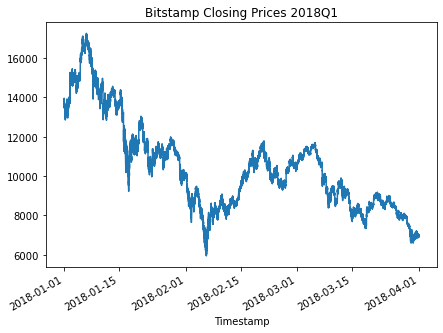

In [100]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced['Close'].plot(figsize=(7,5),title="Bitstamp Closing Prices 2018Q1")

<AxesSubplot:title={'center':'Coinbase Closing Prices 2018Q1'}, xlabel='Timestamp'>

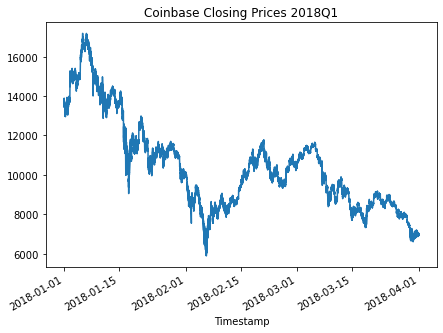

In [102]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced['Close'].plot(figsize=(7,5),title="Coinbase Closing Prices 2018Q1")

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase 2018Q1'}, xlabel='Timestamp'>

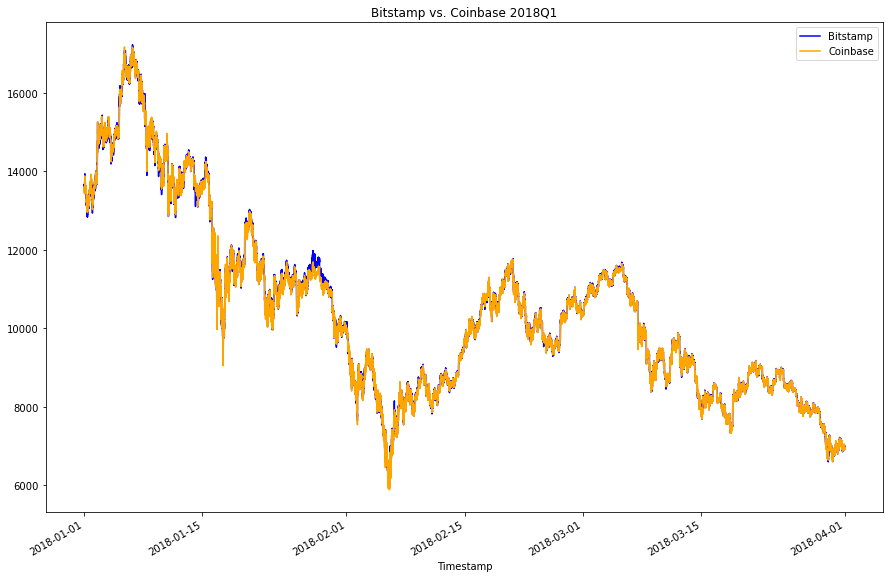

In [104]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced['Close'].plot(legend=True,figsize=(15,10),title="Bitstamp vs. Coinbase 2018Q1",color="blue",label='Bitstamp')
coinbase_sliced['Close'].plot(legend=True,figsize=(15,10),color="orange",label='Coinbase')

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase 2018-Jan'}, xlabel='Timestamp'>

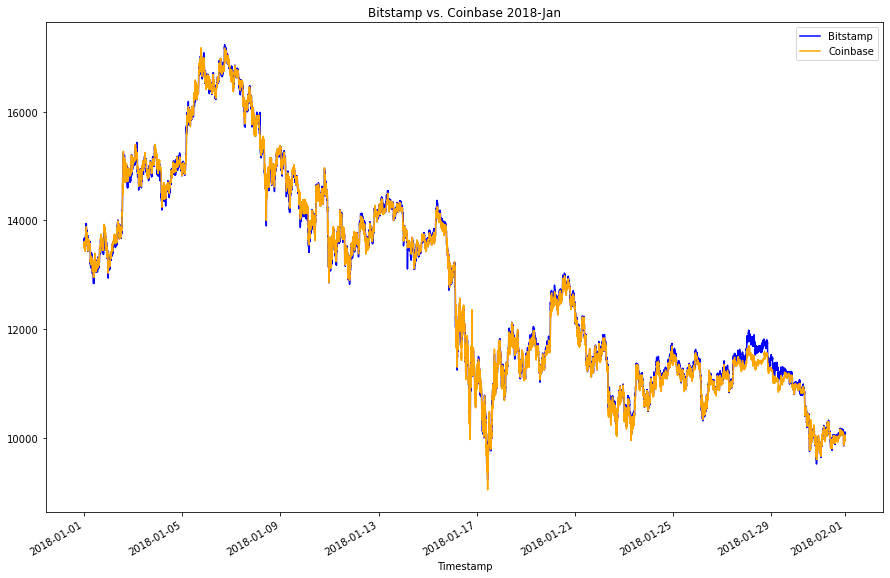

In [106]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced['Close'].loc['2018-1'].plot(legend=True,figsize=(15,10),title="Bitstamp vs. Coinbase 2018-Jan",color="blue",label='Bitstamp')
coinbase_sliced['Close'].loc['2018-1'].plot(legend=True,figsize=(15,10),color="orange",label='Coinbase')

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase 2018-Mar'}, xlabel='Timestamp'>

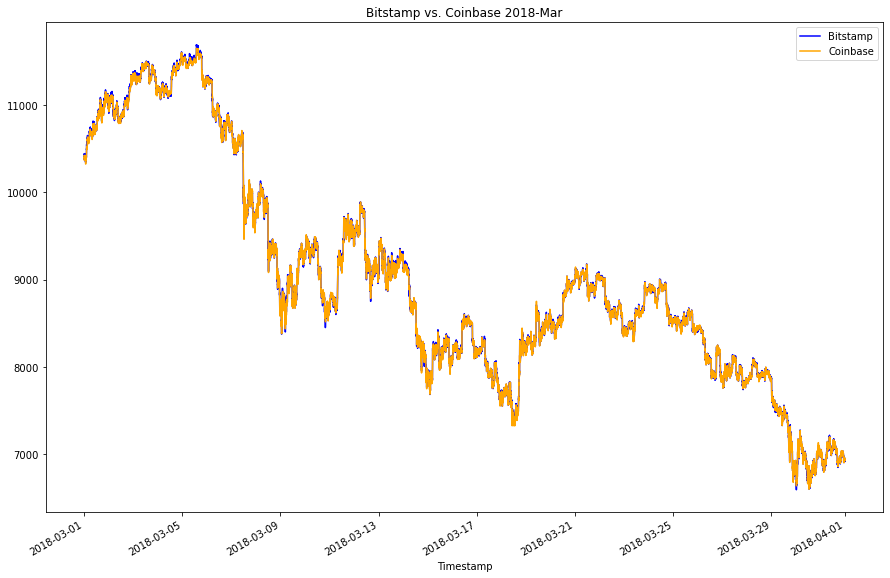

In [108]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp_sliced['Close'].loc['2018-1'].plot(legend=True,figsize=(15,10),title="Bitstamp vs. Coinbase 2018-Jan",color="blue",label='Bitstamp')
coinbase_sliced['Close'].loc['2018-1'].plot(legend=True,figsize=(15,10),color="orange",label='Coinbase')

**Question:** Based on the visualizations of the different time periods, has the degree of spread changed as time progressed?

**Answer:**  Yes - the spread was greater earlier on (January), and closed up toward the end of the quarter (March).

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase 2018-Jan 16'}, xlabel='Timestamp'>

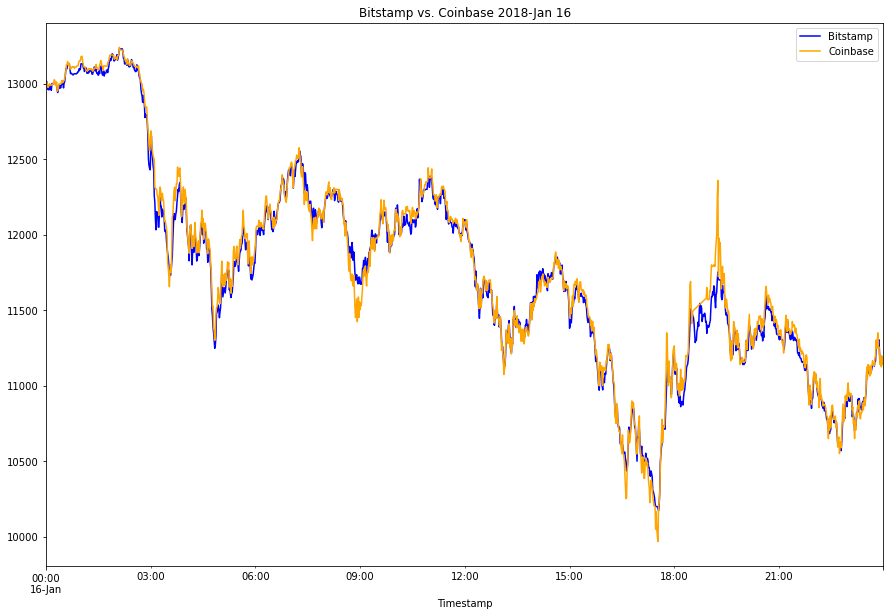

In [110]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced['Close'].loc['2018-1-16'].plot(legend=True,figsize=(15,10),title="Bitstamp vs. Coinbase 2018-Jan 16",color="blue",label='Bitstamp')
coinbase_sliced['Close'].loc['2018-1-16'].plot(legend=True,figsize=(15,10),color="orange",label='Coinbase')

In [113]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = coinbase_sliced['Close'].loc['2018-1-16'] - bitstamp_sliced['Close'].loc['2018-01-16']

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1419.000000
mean       23.212135
std        67.789186
min      -275.920000
25%        -8.330000
50%        22.280000
75%        52.355000
max       606.800000
Name: Close, dtype: float64

<AxesSubplot:>

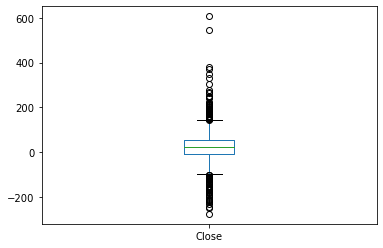

In [114]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot.box()

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase 2018-Feb-24'}, xlabel='Timestamp'>

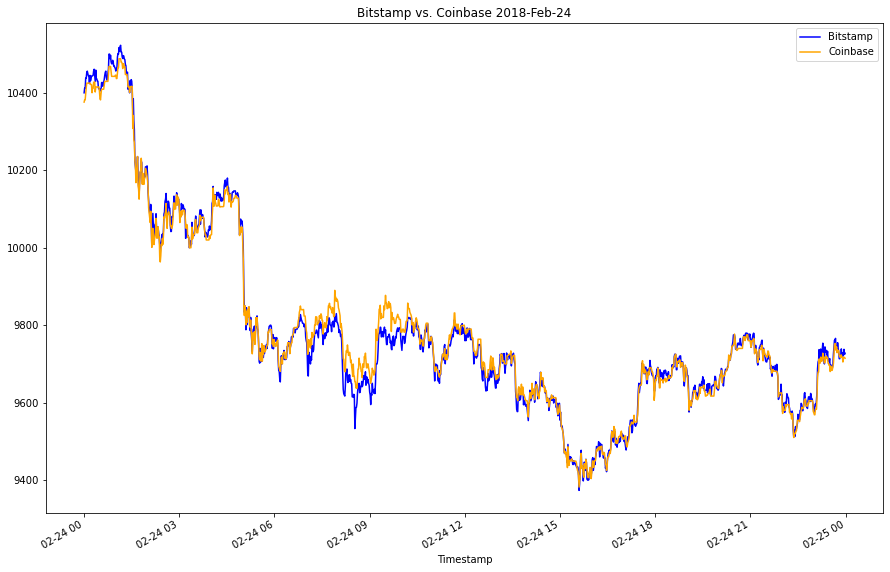

In [117]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced['Close'].loc['2018-2-24'].plot(legend=True,figsize=(15,10),title="Bitstamp vs. Coinbase 2018-Feb-24",color="blue",label='Bitstamp')
coinbase_sliced['Close'].loc['2018-2-24'].plot(legend=True,figsize=(15,10),color="orange",label='Coinbase')

In [119]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = coinbase_sliced['Close'].loc['2018-2-24'] - bitstamp_sliced['Close'].loc['2018-2-24']

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1437.000000
mean        3.396131
std        22.969472
min       -50.180000
25%       -10.590000
50%        -0.010000
75%        12.120000
max       121.320000
Name: Close, dtype: float64

<AxesSubplot:>

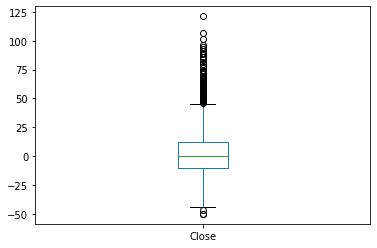

In [120]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot.box()

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase 2018-Mar 26'}, xlabel='Timestamp'>

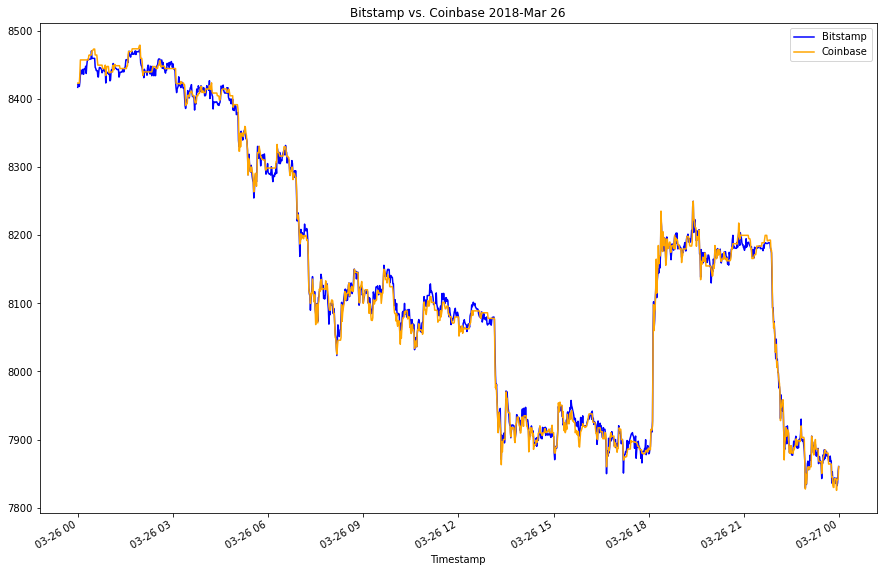

In [121]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced['Close'].loc['2018-3-26'].plot(legend=True,figsize=(15,10),title="Bitstamp vs. Coinbase 2018-Mar 26",color="blue",label='Bitstamp')
coinbase_sliced['Close'].loc['2018-3-26'].plot(legend=True,figsize=(15,10),color="orange",label='Coinbase')

In [123]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = coinbase_sliced['Close'].loc['2018-3-26'] - bitstamp_sliced['Close'].loc['2018-3-26'] 

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1432.000000
mean       -0.722193
std         8.523060
min       -32.040000
25%        -6.812500
50%        -0.730000
75%         4.965000
max        35.070000
Name: Close, dtype: float64

<AxesSubplot:>

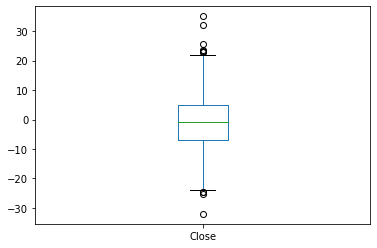

In [124]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot.box()

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [137]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = coinbase_sliced['Close'].loc['2018-1-16'] - bitstamp_sliced['Close'].loc['2018-01-16']
arbitrage_spread_middle = coinbase_sliced['Close'].loc['2018-2-24'] - bitstamp_sliced['Close'].loc['2018-2-24']
arbitrage_spread_late = coinbase_sliced['Close'].loc['2018-3-26'] - bitstamp_sliced['Close'].loc['2018-03-26']
# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
print("Early Spread Stats:")
display(arbitrage_spread_early[arbitrage_spread_early>0].describe())
print("\nMiddle Spread Stats:")
display(arbitrage_spread_middle[arbitrage_spread_middle>0].describe())
print("\nLate Spread Stats:")
arbitrage_spread_late[arbitrage_spread_late>0].describe()

Early Spread Stats:


count    960.000000
mean      53.405344
std       53.910409
min        0.010000
25%       21.602500
50%       39.885000
75%       68.547500
max      606.800000
Name: Close, dtype: float64


Middle Spread Stats:


count    713.000000
mean      19.880351
std       20.699851
min        0.010000
25%        5.040000
50%       12.330000
75%       27.250000
max      121.320000
Name: Close, dtype: float64


Late Spread Stats:


count    651.000000
mean       6.689247
std        5.240159
min        0.010000
25%        2.835000
50%        5.230000
75%        9.195000
max       35.070000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [142]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early = arbitrage_spread_early[arbitrage_spread_early>0] / bitstamp_sliced['Close'].loc['2018-1-16']
spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle>0] / bitstamp_sliced['Close'].loc['2018-2-24']
spread_return_late = arbitrage_spread_late[arbitrage_spread_late>0] / bitstamp_sliced['Close'].loc['2018-03-26']

# Review the spread return DataFrame
print("Early Spread Returns:")
display(spread_return_early.head())
print("\nMiddle Sread Returns:")
display(spread_return_middle.head())
print("\nLate Spread Returns:")
spread_return_late.head()

Early Spread Returns:


Timestamp
2018-01-16 00:00:00         NaN
2018-01-16 00:01:00         NaN
2018-01-16 00:02:00    0.000731
2018-01-16 00:03:00    0.001108
2018-01-16 00:04:00    0.000909
Name: Close, dtype: float64


Middle Sread Returns:


Timestamp
2018-02-24 00:00:00   NaN
2018-02-24 00:01:00   NaN
2018-02-24 00:02:00   NaN
2018-02-24 00:03:00   NaN
2018-02-24 00:04:00   NaN
Name: Close, dtype: float64


Late Spread Returns:


Timestamp
2018-03-26 00:00:00    0.000738
2018-03-26 00:01:00    0.000122
2018-03-26 00:02:00    0.000470
2018-03-26 00:03:00    0.000576
2018-03-26 00:04:00    0.001395
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [145]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early>.01]
profitable_trades_middle = spread_return_middle[spread_return_middle>.01]
profitable_trades_late = spread_return_late[spread_return_late>.01]

# Review the first five profitable trades
display(profitable_trades_early.head())
print("\nMiddle Profitable Trades:")
profitable_trades_middle.head()
print("\nLate Profitable Trades:")
profitable_trades_late.head()

Timestamp
2018-01-16 02:56:00    0.012962
2018-01-16 02:57:00    0.010838
2018-01-16 02:59:00    0.014171
2018-01-16 03:00:00    0.010675
2018-01-16 03:06:00    0.019704
Name: Close, dtype: float64


Middle Profitable Trades:

Late Profitable Trades:


Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [148]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or your trades where the spread returns are are greater than 1%
print("Stats for Early profitable trades:")
display(profitable_trades_early.describe())
print("\nStats for Middle profitable trades:")
display(profitable_trades_middle.describe())
print("\nStats for Late profitable trades")
profitable_trades_late.describe()

Stats for Early profitable trades:


count    73.000000
mean      0.016720
std       0.007628
min       0.010109
25%       0.012061
50%       0.014794
75%       0.018124
max       0.051633
Name: Close, dtype: float64


Stats for Middle profitable trades:


count    3.000000
mean     0.011377
std      0.001199
min      0.010431
25%      0.010703
50%      0.010974
75%      0.011850
max      0.012726
Name: Close, dtype: float64


Stats for Late profitable trades


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [157]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bitstamp_sliced['Close'].loc['2018-01-16']
profit_middle = profitable_trades_middle * bitstamp_sliced['Close'].loc['2018-2-24']
# We're not going to bother at this time to calculate the profit for late period trades since we've already seen that there aren't any
# Changed my mind after seeing the instructions below to plot the results - so we'll see a nice FLAT line!
profit_late = profitable_trades_late * bitstamp_sliced['Close'].loc['2018-03-26']

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()
profit_per_trade_middle = profit_middle.dropna()
profit_per_trade_late = profit_late.dropna()

# View the early profit DataFrame
print("\nProfits for the early date:")
display(profit_per_trade_early)
print("\nProfits for the middle date:")
display(profit_per_trade_middle)
print("\nProfits for the late date:")
profit_per_trade_late
if profit_per_trade_late.count() == 0:
    print('There were no profitable trades on this day :(')


Profits for the early date:


Timestamp
2018-01-16 02:56:00    162.01
2018-01-16 02:57:00    135.00
2018-01-16 02:59:00    176.13
2018-01-16 03:00:00    134.01
2018-01-16 03:06:00    241.54
                        ...  
2018-01-16 19:23:00    125.09
2018-01-16 19:26:00    131.78
2018-01-16 19:38:00    124.01
2018-01-16 19:48:00    117.63
2018-01-16 20:07:00    113.69
Name: Close, Length: 73, dtype: float64


Profits for the middle date:


Timestamp
2018-02-24 08:32:00    121.32
2018-02-24 09:32:00    107.00
2018-02-24 09:39:00    101.75
Name: Close, dtype: float64


Profits for the late date:
There were no profitable trades on this day :(


#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [159]:
# Generate the summary statistics for the early profit per trade DataFrame
display(profit_per_trade_early.describe())
display(profit_per_trade_middle.describe())
profit_per_trade_late.describe()

count     73.000000
mean     193.796849
std       88.701429
min      112.520000
25%      139.420000
50%      171.310000
75%      210.060000
max      606.800000
Name: Close, dtype: float64

count      3.000000
mean     110.023333
std       10.129246
min      101.750000
25%      104.375000
50%      107.000000
75%      114.160000
max      121.320000
Name: Close, dtype: float64

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit Per Trade\nEarly Date'}, xlabel='Timestamp'>

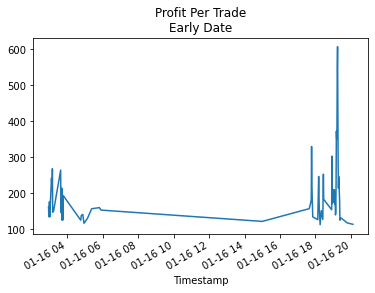

In [164]:
# Plot the results for the early profit per trade DataFrame
display(profit_per_trade_early.plot(title="Profit Per Trade\nEarly Date"))

<AxesSubplot:title={'center':'Profit Per Trade\n2018-02-24'}, xlabel='Timestamp'>

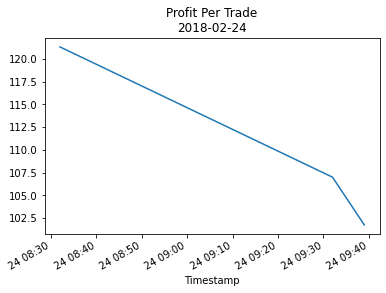

In [165]:
# Plot the results for the middle profit per trade DataFrame
display(profit_per_trade_middle.plot(title='Profit Per Trade\n2018-02-24'))

<AxesSubplot:title={'center':'Profit per Trade\n2018-03-26'}, xlabel='Timestamp'>

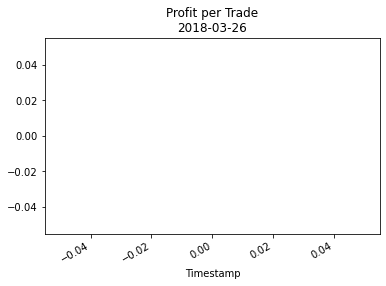

In [166]:
# Plot the results for the late profit per trade DataFrame
display(profit_per_trade_late.plot(title='Profit per Trade\n2018-03-26'))

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [175]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_early_sum = profit_per_trade_early.sum()
print(f"${profit_early_sum:.2f}")

$14147.17


In [174]:
# Sum of potential profits for the middle Profit per Trade DataFrame
profit_middle_sum = profit_per_trade_middle.sum()
print(f"${profit_middle_sum:.2f}")

$330.07


#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [37]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = # YOUR CODE HERE

<AxesSubplot:title={'center':'Cumulative Sum - Early Date'}, xlabel='Timestamp'>

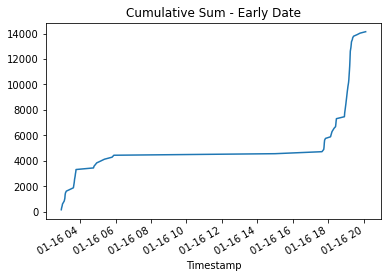

In [38]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# YOUR CODE HERE

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** YOUR ANSWER HERE